4590.281681983913


/Users/michielvanhouten/Dropbox/Mac/Documents/GitHub/abm/.venv/lib/python3.9/site-packages/mesa/time.py:82: FutureWarning: The AgentSet is experimental. It may be changed or removed in any and all future releases, including patch releases.
We would love to hear what you think about this new feature. If you have any thoughts, share them with us here: https://github.com/projectmesa/mesa/discussions/1919
  self._agents: AgentSet = AgentSet(agents, model)


1702767.8437704628
673900
908091.2065007454


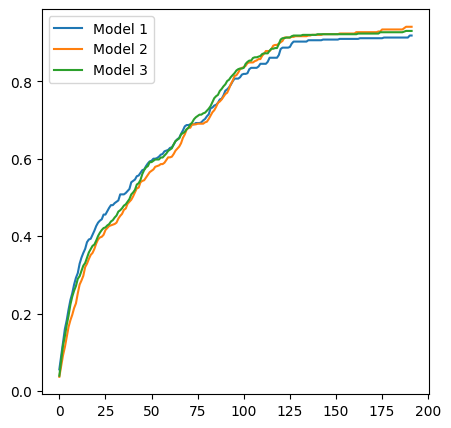

1744997.1363885256
636500
912515.3165464401


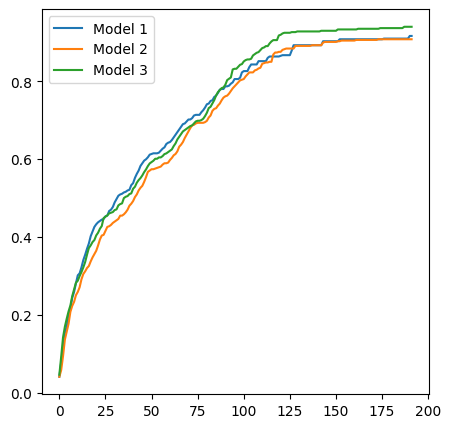

1673735.4015019166
678700
898972.1096244347


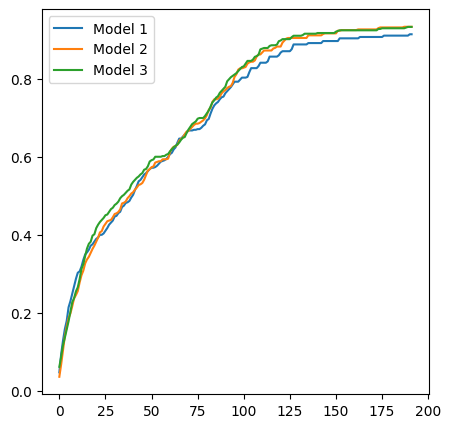

1711848.1007551835
672200
874428.1690155246


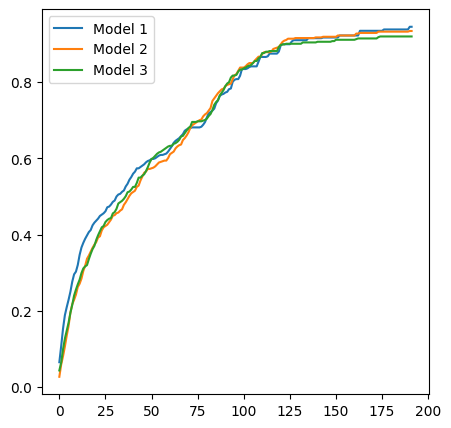

1791624.0826902236
642400
921243.6592601143


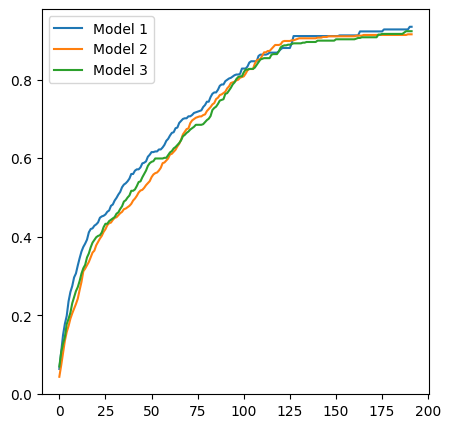

In [1]:
from BaseModel import BaseModelSub
from SubsidieModel import SubsidieModel
from SubsidieModelLinear import SubsidieModel2
from SubsidieModel3 import SubsidieModel3

import random
import numpy as np
import matplotlib.pyplot as plt

scenario1 = [32000, 396000]
scenario2 = [40000, 33000]
scenario3 = [48000, 26400]

aantal_iteraties = 5

avg_percentage_ev = np.zeros((aantal_iteraties))

for iteratie in range(aantal_iteraties):
    ev = scenario1[0]
    fba = scenario1[1]

    model1 = SubsidieModel(ev, fba)
    model2 = SubsidieModel2(ev, fba)
    model3 = SubsidieModel3(ev, fba)
    for j in range(192):
        model1.step()
        model2.step()
        model3.step()

        
    data1 = model1.datacollector.get_model_vars_dataframe()
    data2 = model2.datacollector.get_model_vars_dataframe()
    data3 = model3.datacollector.get_model_vars_dataframe()

    hoeveelheid_sub1 = data1["Hoeveelheid totale Subsidie"].iloc[-1]
    hoeveelheid_sub2 = data2["Hoeveelheid totale Subsidie"].iloc[-1]
    hoeveelheid_sub3 = data3["Hoeveelheid totale Subsidie"].iloc[-1]
    
    print(hoeveelheid_sub1)
    print(hoeveelheid_sub2)
    print(hoeveelheid_sub3)
    
    plt.figure(figsize=(5, 5))

    # Lijnen tekenen voor elk model
    plt.plot(data1["Percerntage EV's van Auto's"], label='Model 1')
    plt.plot(data2["Percerntage EV's van Auto's"], label='Model 2')
    plt.plot(data3["Percerntage EV's van Auto's"], label='Model 3')

    plt.legend()  # Voegt de legenda toe
    plt.show()

1400019.500614787
977500
1189406.2345302075


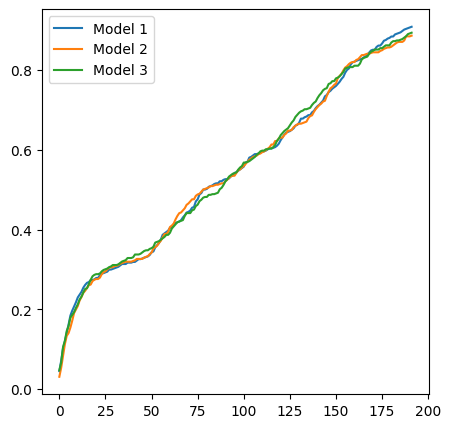

1356947.2580611662
1028800
1260661.4043856415


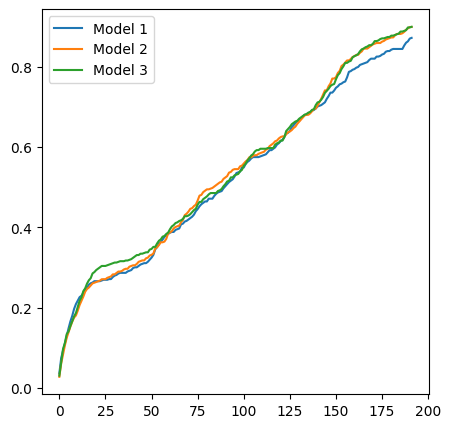

1431144.1914546185
940700
1211412.264285318


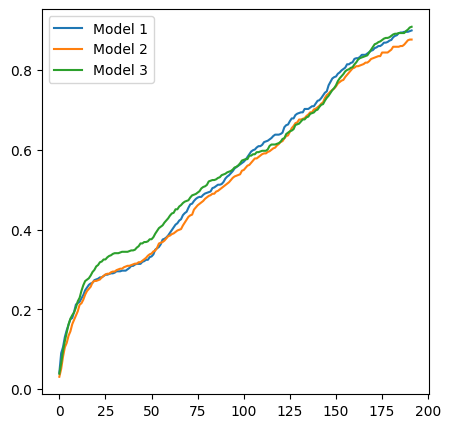

1439520.0894115402
1058600
1237572.1640549572


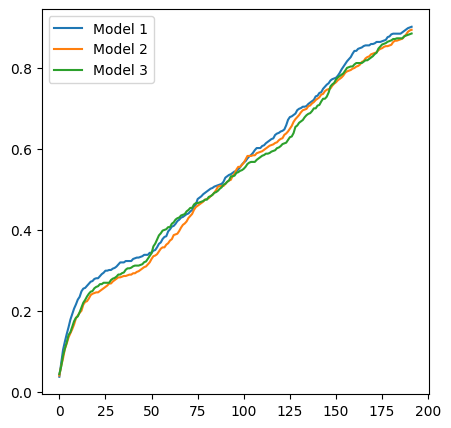

1439117.9726769223
1042300
1213994.5122970084


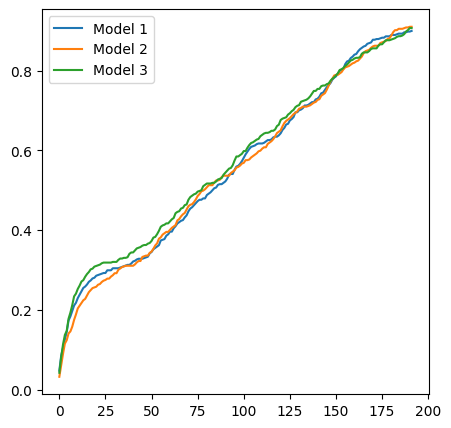

In [2]:
from BaseModel import BaseModelSub
from SubsidieModel import SubsidieModel
from SubsidieModelLinear import SubsidieModel2
from SubsidieModel3 import SubsidieModel3

import random
import numpy as np
import matplotlib.pyplot as plt

avg_percentage_ev2 = np.zeros((aantal_iteraties))

for iteratie in range(aantal_iteraties):
    ev = scenario2[0]
    fba = scenario2[1]

    model4 = SubsidieModel(ev, fba)
    model5 = SubsidieModel2(ev, fba)
    model6 = SubsidieModel3(ev, fba)
    for j in range(192):
        model4.step()
        model5.step()
        model6.step()

        
    data4 = model4.datacollector.get_model_vars_dataframe()
    data5 = model5.datacollector.get_model_vars_dataframe()
    data6 = model6.datacollector.get_model_vars_dataframe()
    
    hoeveelheid_sub4 = data4["Hoeveelheid totale Subsidie"].iloc[-1]
    hoeveelheid_sub5 = data5["Hoeveelheid totale Subsidie"].iloc[-1]
    hoeveelheid_sub6 = data6["Hoeveelheid totale Subsidie"].iloc[-1]
    
    print(hoeveelheid_sub4)
    print(hoeveelheid_sub5)
    print(hoeveelheid_sub6)


    # Lijnen tekenen voor elk model
    plt.figure(figsize=(5, 5))

    # Lijnen tekenen voor elk model
    plt.plot(data4["Percerntage EV's van Auto's"], label='Model 1')
    plt.plot(data5["Percerntage EV's van Auto's"], label='Model 2')
    plt.plot(data6["Percerntage EV's van Auto's"], label='Model 3')

    plt.legend()  # Voegt de legenda toe
    plt.show()

1268862.215343162
869700
1000651.6629130665


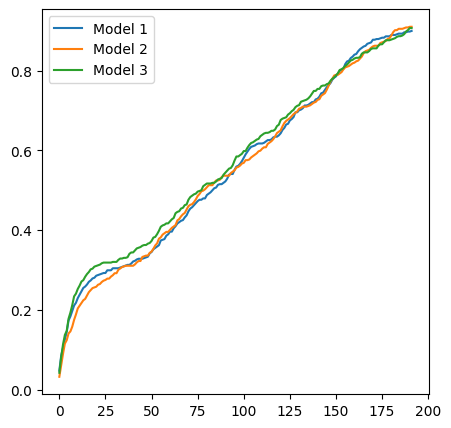

1345798.9774469386
795800
995019.0847204643


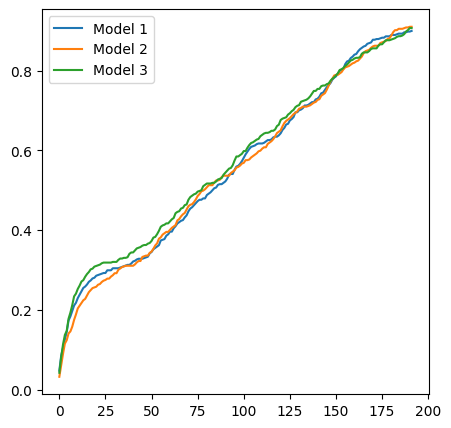

1318130.7035775215
852600
1058305.241780423


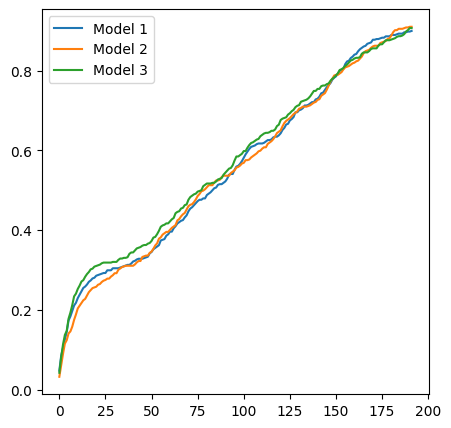

1326572.9942404432
856000
1003490.1266604146


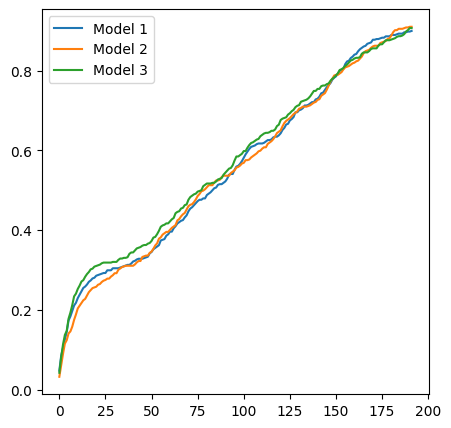

1232862.22864588
819600
1031899.6067449945


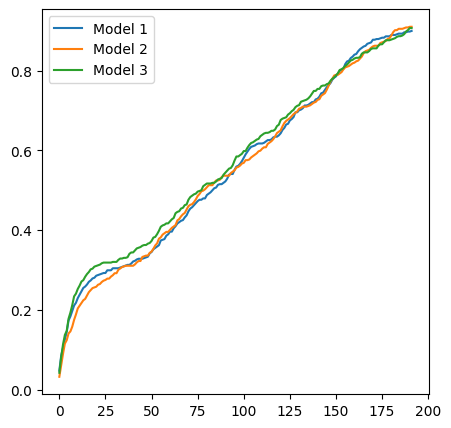

In [3]:
from BaseModel import BaseModelSub
from SubsidieModel import SubsidieModel
from SubsidieModelLinear import SubsidieModel2
from SubsidieModel3 import SubsidieModel3

import random
import numpy as np
import matplotlib.pyplot as plt

avg_percentage_ev3 = np.zeros((aantal_iteraties))

for iteratie in range(aantal_iteraties):
    ev = scenario3[0]
    fba = scenario3[1]

    model7 = SubsidieModel(ev, fba)
    model8 = SubsidieModel2(ev, fba)
    model9 = SubsidieModel3(ev, fba)
    for j in range(192):
        model7.step()
        model8.step()
        model9.step()

        
    data7 = model7.datacollector.get_model_vars_dataframe()
    data8 = model8.datacollector.get_model_vars_dataframe()
    data9 = model9.datacollector.get_model_vars_dataframe()
    
    hoeveelheid_sub7 = data7["Hoeveelheid totale Subsidie"].iloc[-1]
    hoeveelheid_sub8 = data8["Hoeveelheid totale Subsidie"].iloc[-1]
    hoeveelheid_sub9 = data9["Hoeveelheid totale Subsidie"].iloc[-1]
    
    print(hoeveelheid_sub7)
    print(hoeveelheid_sub8)
    print(hoeveelheid_sub9)

    # Lijnen tekenen voor elk model
    plt.figure(figsize=(5, 5))

    # Lijnen tekenen voor elk model
    plt.plot(data4["Percerntage EV's van Auto's"], label='Model 1')
    plt.plot(data5["Percerntage EV's van Auto's"], label='Model 2')
    plt.plot(data6["Percerntage EV's van Auto's"], label='Model 3')

    plt.legend()  # Voegt de legenda toe
    plt.show()